In [1]:
!git clone https://github.com/tychovdo/MovingMNIST.git

Cloning into 'MovingMNIST'...
remote: Enumerating objects: 19, done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (19/19), done.


In [2]:
import torch
from MovingMNIST.MovingMNIST import MovingMNIST

train_set = MovingMNIST(root='.data/mnist', train=True, download=True)

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=100,
                 shuffle=True)

Processing...
Done!


In [0]:
import numpy as np
data = np.empty((9000,10,64,64));
for i in range(9000):
  data[i,:,:,:] = train_set[i][0]
data = np.reshape(data,(9000,10,64,64,1))

In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import numpy as np
import pylab as plt

seq = Sequential()
seq.add(ConvLSTM2D(filters=60, kernel_size=(3, 3),
                   input_shape=(None, 64, 64, 1),
                   padding='same', return_sequences=True,activation ="relu"))
seq.add(BatchNormalization())
seq.add(Dropout(0.5))

seq.add(ConvLSTM2D(filters=60, kernel_size=(3, 3),
                   padding='same', return_sequences=True,activation="relu"))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=60, kernel_size=(3, 3),
                   padding='same', return_sequences=True,activation ="relu"))
seq.add(BatchNormalization())
seq.add(Dropout(0.5))
seq.add(ConvLSTM2D(filters=60, kernel_size=(3, 3),
                   padding='same', return_sequences=True,activation="sigmoid"))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=60, kernel_size=(3, 3, 3),
               activation='relu',
               padding='same', data_format='channels_last'))
seq.add(BatchNormalization())
seq.add(Dropout(0.5))
seq.add(Conv3D(filters=60, kernel_size=(3, 3, 3),
               activation='relu',
               padding='same', data_format='channels_last'))
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')
seq.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 64, 64, 60)  132000    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 64, 64, 60)  240       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64, 64, 60)  0         
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 64, 64, 60)  259440    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 64, 64, 60)  240       
_____________________________________

In [0]:
import random
data_x = data[:,0:9,:,:,:];
data_y = data[:,1:10,:,:,:];
for i in range(1000):
  seed = random.random();
  if seed>0.5:
    seed = random.randint(1,8);
    data_x[i,seed,:,:,:] = np.zeros((64,64,1));
    data_y[i,seed-1,:,:,:] = np.zeros((64,64,1));

In [10]:
seq.fit(data_x[:5000], data_y[:5000], batch_size=10,
        epochs=10, validation_split=0.05,verbose=1)

Train on 4750 samples, validate on 250 samples
Epoch 1/10
4750/4750 [==============================] - 1409s 297ms/step - loss: -195.8291 - val_loss: -194.3637
Epoch 2/10
4750/4750 [==============================] - 1403s 295ms/step - loss: -196.5645 - val_loss: -194.5694
Epoch 3/10
4750/4750 [==============================] - 1402s 295ms/step - loss: -196.6797 - val_loss: -194.6049
Epoch 4/10
4750/4750 [==============================] - 1401s 295ms/step - loss: -196.7070 - val_loss: -194.6055
Epoch 5/10
4750/4750 [==============================] - 1394s 294ms/step - loss: -196.7212 - val_loss: -194.6131
Epoch 6/10
4750/4750 [==============================] - 1403s 295ms/step - loss: -196.7260 - val_loss: -194.6199
Epoch 7/10
4750/4750 [==============================] - 1399s 295ms/step - loss: -196.7284 - val_loss: -194.6023
Epoch 8/10
4750/4750 [==============================] - 1400s 295ms/step - loss: -196.7278 - val_loss: -194.6145
Epoch 9/10
4750/4750 [===========================

In [1]:
newmissingdata = data_x[5001,0:7,:,:,:];
print(newmissingdata.shape)
newmissingdata[5,:,:,0] = np.zeros((64,64));
new = seq.predict(np.reshape(newmissingdata,(1,7,64,64,1)))

NameError: ignored

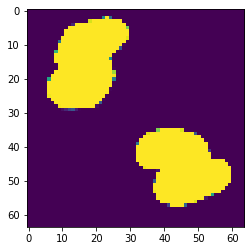

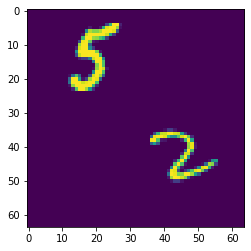

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(new[0,6,:,:,0])
plt.figure()
plt.imshow(data_x[5001,7,:,:,0])

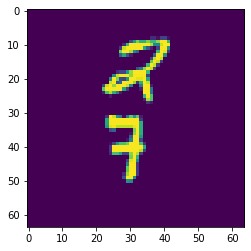

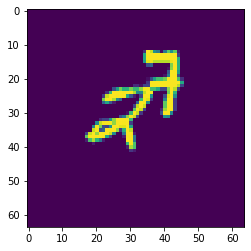

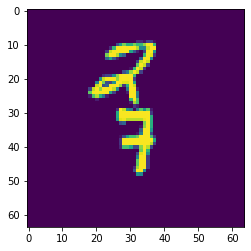

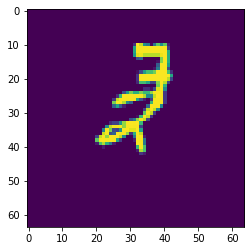

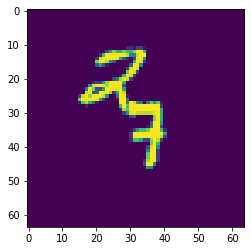

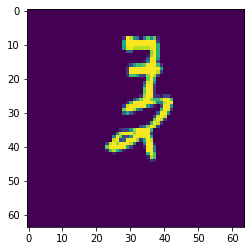

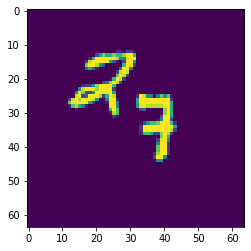

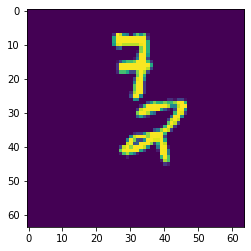

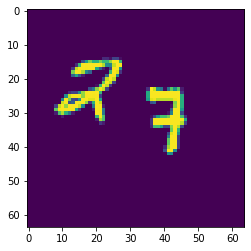

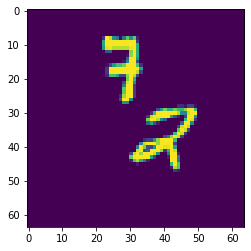

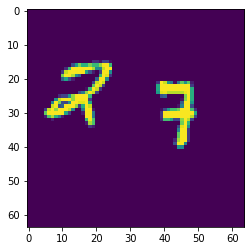

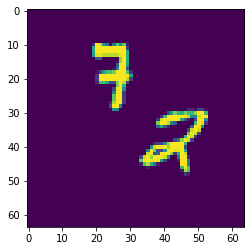

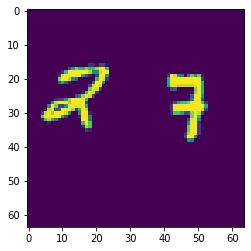

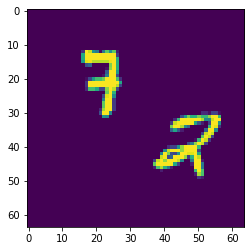

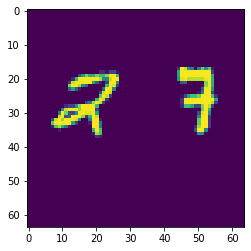

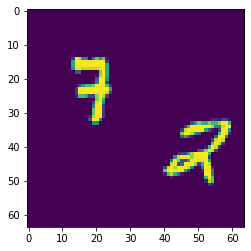

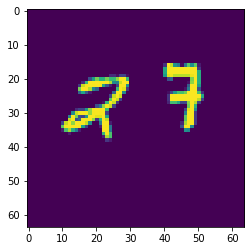

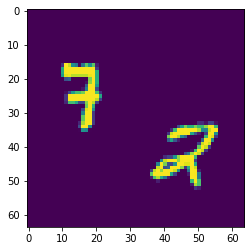

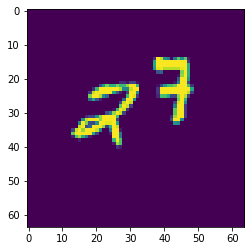

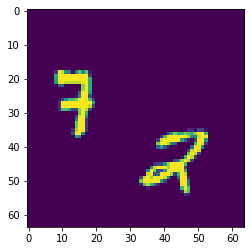

In [7]:
for i in range(10):
  plt.figure();
  plt.imshow(train_set[0][0][i]);
  plt.figure();
  plt.imshow(train_set[0][1][i]);

bytes